In [1]:
import pandas as pd
from itertools import cycle, islice

# Create dataframe from spreadsheet using pandas
culture_df_start = pd.read_csv("culturecheckup.csv", header= 0,
                        encoding= 'unicode_escape', names=['ID','Start time','Completion time','Email','Name','Which team do you contribute to?'
                                                          ,'On my team, information is actively sought'
                                                          ,'On my team, I feel I can deliver bad news or news of a failure without retribution'
                                                          ,'On my team, responsibilities are shared'
                                                          ,'On my team, cross-functional collaboration is encouraged and rewarded'
                                                          ,'On my team, failure leads to learning'
                                                          ,'On my team, new ideas are welcomed'
                                                          ,'Is there any additional information to help frame your submissions above? Examples?'])

# Drop unused columns for sharing 6 likert responses
del culture_df_start["Email"]
del culture_df_start["Name"]
del culture_df_start["Is there any additional information to help frame your submissions above? Examples?"]
del culture_df_start["ID"]
del culture_df_start["Start time"]
del culture_df_start["Completion time"]

# Uncomment below if in the future you want to eliminate this question, but future version we want to isolate teams for them to analyze
# del culture_df_start["Which team do you contribute to?"]

# Drop null values to keep only rows with entries for questions
culture_df = culture_df_start.dropna()

# uncomment to see dataframe
# culture_df

In [2]:
# Define phrase variables
phrase_one = 'On my team, information is actively sought'
phrase_two = 'On my team, I feel I can deliver bad news or news of a failure without retribution'
phrase_three = 'On my team, responsibilities are shared'
phrase_four = 'On my team, cross-functional collaboration is encouraged and rewarded'
phrase_five = 'On my team, failure leads to learning'
phrase_six = 'On my team, new ideas are welcomed'

# Create PopulateResults class
class PopulateResults:
    """This class will be used to iterate through the dataframe created from the survey results.csv
    file for each phrase included in the survey."""

    def __init__(self, phrase):
        self.phrase = phrase
        self.ones = 0
        self.twos = 0
        self.threes = 0
        self.fours = 0
        self.fives = 0
        self.sixes = 0
        self.sevens = 0
        results = [x for x in culture_df[phrase]]
        for i in results:
            if int(i) == 1:
                self.ones += 1
            elif int(i) == 2:
                self.twos += 1
            elif int(i) == 3:
                self.threes += 1
            elif int(i) == 4:
                self.fours += 1
            elif int(i) == 5:
                self.fives += 1
            elif int(i) == 6:
                 self.sixes += 1
            elif int(i) == 7:
                self.sevens += 1

# Instantiate the PopulateResults class to populate results for phrase one
phrase_one_results = PopulateResults(phrase_one)

# Create a new dictionary with results from phrase 1 to be used for populating all results       
phrase_one_results_dict = {'Phrase':[phrase_one_results.phrase],'1': phrase_one_results.ones,'2': phrase_one_results.twos,'3': phrase_one_results.threes,'4': phrase_one_results.fours,'5': phrase_one_results.fives,'6': phrase_one_results.sixes,'7': phrase_one_results.sevens}

# Create a new dataframe with results from phrase 1 that will be used to contain all survey results
survey_results_df = pd.DataFrame(data=phrase_one_results_dict)
survey_results_df

,Phrase,1,2,3,4,5,6,7
0,"On my team, information is actively sought",3,3,3,8,15,53,70


In [3]:
# Instantiate the PopulateResults class to populate results for phrase two
phrase_two_results = PopulateResults(phrase_two)
                                     
# Create a new dictionary with results from phrase two             
phrase_two_results_dict = {'Phrase':phrase_two_results.phrase,'1': phrase_two_results.ones,'2': phrase_two_results.twos,'3': phrase_two_results.threes,'4': phrase_two_results.fours,'5': phrase_two_results.fives,'6': phrase_two_results.sixes,'7': phrase_two_results.sevens}

# Add results of phrase 2 to survey_results_df
survey_results_df = survey_results_df.append(phrase_two_results_dict, ignore_index=True)

# Show dataframe
survey_results_df

,Phrase,1,2,3,4,5,6,7
0,"On my team, information is actively sought",3,3,3,8,15,53,70
1,"On my team, I feel I can deliver bad news or n...",5,3,2,11,12,46,76


In [4]:
# Instantiate the PopulateResults class to populate results for phrase three
phrase_three_results = PopulateResults(phrase_three)
                                     
# Create a new dictionary with results from phrase 3               
phrase_three_results_dict = {'Phrase':phrase_three_results.phrase,'1': phrase_three_results.ones,'2': phrase_three_results.twos,'3': phrase_three_results.threes,'4': phrase_three_results.fours,'5': phrase_three_results.fives,'6': phrase_three_results.sixes,'7': phrase_three_results.sevens}

# Add results of phrase 3 to survey_results_df 
survey_results_df = survey_results_df.append(phrase_three_results_dict, ignore_index=True)

# Show dataframe
survey_results_df

,Phrase,1,2,3,4,5,6,7
0,"On my team, information is actively sought",3,3,3,8,15,53,70
1,"On my team, I feel I can deliver bad news or n...",5,3,2,11,12,46,76
2,"On my team, responsibilities are shared",5,6,4,12,23,58,47


In [5]:
# Grouping phrases 4-6 in the same block in this notebook to more quickly execute

# Instantiate the PopulateResults class to populate results for phrase four
phrase_four_results = PopulateResults(phrase_four)
                                     
# Create a new dictionary with results from phrase 4              
phrase_four_results_dict = {'Phrase':phrase_four_results.phrase,'1': phrase_four_results.ones,'2': phrase_four_results.twos,'3': phrase_four_results.threes,'4': phrase_four_results.fours,'5': phrase_four_results.fives,'6': phrase_four_results.sixes,'7': phrase_four_results.sevens}

# Add results of phrase 4 to survey_results_df 
survey_results_df = survey_results_df.append(phrase_four_results_dict, ignore_index=True)


# Instantiate the PopulateResults class to populate results for phrase five
phrase_five_results = PopulateResults(phrase_five)
                                     
# Create a new dictionary with results from phrase 5              
phrase_five_results_dict = {'Phrase':phrase_five_results.phrase,'1': phrase_five_results.ones,'2': phrase_five_results.twos,'3': phrase_five_results.threes,'4': phrase_five_results.fours,'5': phrase_five_results.fives,'6': phrase_five_results.sixes,'7': phrase_five_results.sevens}

# Add results of phrase 5 to survey_results_df 
survey_results_df = survey_results_df.append(phrase_five_results_dict, ignore_index=True)


# Instantiate the PopulateResults class to populate results for phrase six
phrase_six_results = PopulateResults(phrase_six)
                                     
# Create a new dictionary with results from phrase 6           
phrase_six_results_dict = {'Phrase':phrase_six_results.phrase,'1': phrase_six_results.ones,'2': phrase_six_results.twos,'3': phrase_six_results.threes,'4': phrase_six_results.fours,'5': phrase_six_results.fives,'6': phrase_six_results.sixes,'7': phrase_six_results.sevens}

# Add results of phrase 6 to survey_results_df 
survey_results_df = survey_results_df.append(phrase_six_results_dict, ignore_index=True)

# Set dataframe index column to 'Question'
survey_results_df.set_index('Phrase')

,1,2,3,4,5,6,7
Phrase,,,,,,,
"On my team, information is actively sought",3,3,3,8,15,53,70
"On my team, I feel I can deliver bad news or news of a failure without retribution",5,3,2,11,12,46,76
"On my team, responsibilities are shared",5,6,4,12,23,58,47
"On my team, cross-functional collaboration is encouraged and rewarded",6,2,6,18,18,43,62
"On my team, failure leads to learning",7,1,4,16,17,50,60
"On my team, new ideas are welcomed",6,2,3,9,10,39,86


<AxesSubplot:title={'center':'Culture Check-Up'}, ylabel='Phrase'>

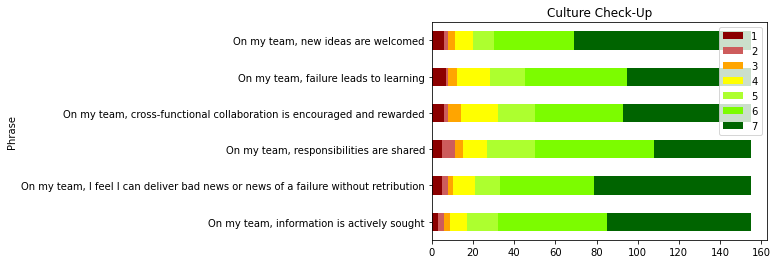

In [6]:
# Set colors from shades of red to yellow to green, red being negative responses and green being positive
my_colors = list(islice(cycle(['#8b0000', '#cd5c5c', '#ffa500', '#ffff00', '#adff2f', '#7cfc00', '#006400']), None, 7))

# Plot dataframe with colors as outlined above
survey_results_df_colors = survey_results_df.plot(
    x = 'Phrase',
    kind = 'barh',
    stacked = True,
    title = 'Culture Check-Up',
    mark_right = True,
    color = my_colors)

# Show dataframe
survey_results_df_colors